# ==========================

# Heart Rate Variability Dataset

DATA Provided by SMC Professor J.A.

In [1]:
import csv
import random
import torch
import torchvision
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# from PIL import Image

In [2]:
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.optimizers import SGD
# from tensorflow.keras import utils as np_utils
# from tensorflow.keras.metrics import binary_focal_crossentropy
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from torch.utils.data import TensorDataset, DataLoader

In [3]:
## Set this if you want to check all information from dataframe without ... auto.
np.set_printoptions(threshold=np.inf, linewidth=np.inf) #inf = infinity 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

# Data Handling

## Dataset variables

> "Demographic info" : Gender, Age \
> "Questionnaires" : HAMD, HAMA, BDI-II, BAI, MDQ, HCL-32 \
> "HRV's 17 Features" : SDNN, PSI, VLF, LF, HF, TP, LFNORM, HFNORM, LF/HF Ratio, RMSSD, APEN, SRD, TSRD, TP_ln, LF_ln, HF_ln \
> "Main Disease Groups" : 
>> MDDs = 602 \
>> MDDr = 529 \
>> PD = 353 \
>> Adj = 341 \
>> BP_II = 337 \
>> SSD = 324 \
>> PDAG = 291 \
>> PDD = 189 \
>> DEP_NOS = 188 \
>> GAD = 165 \
>> ANX_NOS = 146 \
>> ADHD = 70 \
>> BP_I = 67 \
>> OCD = 51 \
>> SAD = 45 \
>> PTSD = 41 \
>> INSOMNIA = 50 \
>> Alcohol_dependence = 36 \
>> SPR = 34 \
>> Tourette = 22 \
>> Normal = 19 \
>> Tic = 12 \
>> OMS = 10

## Importing Original Dataset

In [4]:
hrv_ori = pd.read_excel('E:/RESEARCH/Datasets/HRV/JA/HRV_.xlsx')
# hrv_ori = pd.read_csv('E:/RESEARCH/Datasets/HRV/JA/HRV_dataset_processed_.csv')

In [5]:
print(hrv_ori.dtypes)

subject               object
gender                object
age                    int64
auto_activity        float64
auto_balance         float64
stress_resist        float64
stress_index         float64
tired                float64
avg_hr               float64
heart_stable         float64
abnormal_hr          float64
sdnn                 float64
psi                   object
tp                   float64
vlf                  float64
lf                   float64
hf                   float64
lfnorm               float64
hfnorm               float64
lf_hf                float64
rmssd                float64
apen                 float64
srd                  float64
tsrd                 float64
tp_ln                float64
vlf_ln               float64
lf_ln                float64
hf_ln                float64
main_dx               object
subtype               object
second_dx             object
third_dx              object
depressed            float64
guilty               float64
suicide       

In [6]:
hrv_ori

,subject,gender,age,auto_activity,auto_balance,stress_resist,stress_index,tired,avg_hr,heart_stable,abnormal_hr,sdnn,psi,tp,vlf,lf,hf,lfnorm,hfnorm,lf_hf,rmssd,apen,srd,tsrd,tp_ln,vlf_ln,lf_ln,hf_ln,main_dx,subtype,second_dx,third_dx,depressed,guilty,suicide,insomnia_one,insomnia_two,insomnia_three,activity,retard,tension,mental_anxiety,physical_anxiety,gastric_symp,physical_symp,sexual_symp,hypochondriac,weight_loss,disease_insight,HAMD,anxiety,nervous,fear,insomnia,cognitive,depressed_feeling,muscular,sensory,cardiovascular,respiratory,gastrointenstinal,genitourinary,autonomic_system,interview_act,HAMA,BDI-II,BAI,MDQ,HCL-32,Unnamed: 69,Unnamed: 70
0,A0001,F,64,50.0,76.0,59.0,150.0,150.0,82.0,50.0,0.0,6.986,1027.5,28.904,17.779,3.689,7.437,33.153,66.847,0.496,6.085,0.886,0.918,53.168,3.364,2.878,1.305,2.006,SSD,NaN,PDD,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,1.0,11.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,14.0,19.0,7.0,2.0,11.0,NaN,NaN
1,A0002,F,27,101.0,74.0,105.0,87.0,92.0,68.0,91.0,1.0,50.512,18.532,1544.762,806.214,596.783,141.765,80.805,19.195,4.210,29.417,1.086,0.887,124.389,7.343,6.692,6.392,4.954,BP_II,NaN,cluster B,NaN,1.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,17.0,43.0,NaN,7.0,1.0,NaN,NaN
2,A0003,M,21,92.0,78.0,93.0,104.0,107.0,98.0,76.0,6.0,34.066,59.8,1105.283,719.716,337.356,48.211,87.496,12.504,6.997,14.649,1.058,1.043,73.545,7.008,6.579,5.821,3.876,PDD,NaN,NaN,NaN,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,23.0,2.0,2.0,1.0,3.0,2.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,20.0,40.0,NaN,6.0,11.0,NaN,NaN
3,A0004,F,41,93.0,92.0,100.0,91.0,105.0,71.0,116.0,0.0,33.883,36.211,577.723,103.019,122.458,352.246,25.797,74.203,0.348,34.932,1.117,0.919,149.152,6.359,4.635,4.808,5.864,SSD,NaN,PDAG,NaN,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,1.0,2.0,0.0,2.0,1.0,1.0,26.0,4.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,4.0,2.0,32.0,40.0,NaN,3.0,0.0,NaN,
4,A0005,F,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDAG,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,13.0,3.0,2.0,2.0,1.0,2.0,1.0,0.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,23.0,25.0,40.0,2.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,A3968,M,40,84.0,58.0,92.0,105.0,112.0,77.0,99.0,0.0,32.151,64.904,660.694,200.115,230.116,230.463,49.962,50.038,0.998,28.090,1.093,0.880,123.503,6.493,5.299,5.439,5.440,SSD,NaN,GAD,NaN,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,3.0,1.0,0.0,16.0,3.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,17.0,28.0,37.0,3.0,4.0,NaN,NaN
3965,A3969,F,26,82.0,108.0,97.0,96.0,128.0,75.0,97.0,0.0,45.486,31.665,643.240,225.339,84.094,333.807,20.123,79.877,0.252,37.048,0.981,0.850,148.983,6.467,5.418,4.432,5.811,BP_II,NaN,GAD,NaN,2.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,22.0,2.0,NaN,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,25.0,50.0,22.0,10.0,19.0,NaN,NaN
3966,A3970,F,59,50.0,18.0,68.0,150.0,150.0,80.0,50.0,0.0,13.715,295.057,62.293,30.029,17.360,14.905,53.804,46.196,1.165,8.327,1.160,0.958,67.150,4.132,3.402,2.854,2.702,MDDr,NaN,NaN,NaN,2.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,17.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,9.0,25.0,14.0,3.0,8.0,NaN,NaN
3967,A3971,F,42,97.0,114.0,97.0,99.0,150.0,78.0,94.0,2.0,36.715,59.587,999.433,822.269,31.663,145.501,17.872,82.128,0.218,34.417,1.068,0.896,133.216,6.907,6.712,3.455,4.980,SAD,NaN,OCD,PDD,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,16.0,2.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,19.0,21.0,24.0,6

* Some patients data have "NA" values in hrv_features and their biological dataset. 
* Therefore, we will remove those data in this analysis.
* From the result below, total 280 patients are removed.

In [7]:
hrv = hrv_ori[~pd.isnull(hrv_ori['sdnn'])]
hrv_only = hrv.loc[:, ['sdnn','psi','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen','srd','tsrd',
                          'tp_ln', 'vlf_ln','lf_ln','hf_ln' ]]

In [8]:
print("Original import data shape is:", hrv_ori.shape)
print("Data with NA patients removed is:", hrv.shape)
print("The number of removed patients is:", hrv_ori.shape[0] - hrv.shape[0])

Original import data shape is: (3969, 71)
Data with NA patients removed is: (3689, 71)
The number of removed patients is: 280


## Generating new Variables for analysis

* Here, we are trying to use current depressive, anxious mood status instead of using main dx or sub

In [9]:
hrv_data = hrv.copy()
hrv_data['HAMD_'] = "NULL"
hrv_data['HAMA_'] = "NULL"
hrv_data['BDI_'] = "NULL"
hrv_data['BAI_'] = "NULL"
# hrv_data['MDQ_'] = 0
# hrv_data['HCL_'] = 0

In [10]:
## Categorizing HAMD scores to generate 'HAMD_' label variable.
hrv_data.loc[hrv_data['HAMD']<7, 'HAMD_'] = "normal"
hrv_data.loc[(hrv_data['HAMD']>=7) & (hrv_data['HAMD']<18), 'HAMD_'] = "mild"
hrv_data.loc[(hrv_data['HAMD']>=18) & (hrv_data['HAMD']<25), 'HAMD_'] = "moderate"
hrv_data.loc[hrv_data['HAMD']>=25, 'HAMD_'] = "severe"

In [11]:
## Categorizing HAMA scores to generate 'HAMA_' label variable.
hrv_data.loc[hrv_data['HAMA']<18, 'HAMA_'] = "normal"
hrv_data.loc[(hrv_data['HAMA']>=18) & (hrv_data['HAMA']<25), 'HAMA_'] = "mild"
hrv_data.loc[(hrv_data['HAMA']>=25) & (hrv_data['HAMA']<30), 'HAMA_'] = "moderate"
hrv_data.loc[hrv_data['HAMA']>=30, 'HAMA_'] = "severe"

In [12]:
## Categorizing BDI-II scores to generate 'BDI_' label variable.
hrv_data.loc[hrv_data['BDI-II']<14, 'BDI_'] = "normal"
hrv_data.loc[(hrv_data['BDI-II']>=14) & (hrv_data['BDI-II']<19), 'BDI_'] = "mild"
hrv_data.loc[(hrv_data['BDI-II']>=19) & (hrv_data['BDI-II']<28), 'BDI_'] = "moderate"
hrv_data.loc[hrv_data['BDI-II']>=28, 'BDI_'] = "severe"

In [13]:
## Categorizing BAI scores to generate 'BAI_' label variable.
hrv_data.loc[hrv_data['BAI']<8, 'BAI_'] = "normal"
hrv_data.loc[(hrv_data['BAI']>=8) & (hrv_data['BAI']<16), 'BAI_'] = "mild"
hrv_data.loc[(hrv_data['BAI']>=16) & (hrv_data['BAI']<26), 'BAI_'] = "moderate"
hrv_data.loc[hrv_data['BAI']>=26, 'BAI_'] = "severe"

In [14]:
# hrv_data.to_csv("E:/RESEARCH/Datasets/HRV/JA/HRV_prep.csv", index = False)

* main_dx is first diagnostic result of the patient.
* Most of the patients in our dataset are MDD, PD, BP, ...

In [15]:
hrv_data["HAMD_"].value_counts()
# hrv_data["HAMA_"].value_counts()

# hrv_data["main_dx"].value_counts()
# hrv_data["subtype"].value_counts()
# hrv_data["gender"].value_counts()

mild        1960
moderate    1119
normal       304
severe       295
NULL          11
Name: HAMD_, dtype: int64

In [16]:
hrv.columns  ## Check the variables 

Index(['subject', 'gender', 'age', 'auto_activity', 'auto_balance', 'stress_resist',
       'stress_index', 'tired', 'avg_hr', 'heart_stable', 'abnormal_hr', 'sdnn', 'psi', 'tp',
       'vlf', 'lf', 'hf', 'lfnorm', 'hfnorm', 'lf_hf', 'rmssd', 'apen', 'srd', 'tsrd', 'tp_ln',
       'vlf_ln', 'lf_ln', 'hf_ln', 'main_dx', 'subtype', 'second_dx', 'third_dx', 'depressed',
       'guilty', 'suicide', 'insomnia_one', 'insomnia_two', 'insomnia_three', 'activity', 'retard',
       'tension', 'mental_anxiety', 'physical_anxiety', 'gastric_symp', 'physical_symp',
       'sexual_symp', 'hypochondriac', 'weight_loss', 'disease_insight', 'HAMD', 'anxiety',
       'nervous', 'fear', 'insomnia', 'cognitive', 'depressed_feeling', 'muscular', 'sensory',
       'cardiovascular', 'respiratory', 'gastrointenstinal', 'genitourinary', 'autonomic_system',
       'interview_act', 'HAMA', 'BDI-II', 'BAI', 'MDQ', 'HCL-32', 'Unnamed: 69', 'Unnamed: 70'],
      dtype='object')

## Separating dataset for its Usage

In [16]:
hrv_total = hrv  ## Overall dataset
hrv_subtype = hrv[~pd.isnull(hrv['subtype'])] ## selecting the dataset with subtype included
hrv_mdd = hrv[hrv['main_dx'].isin (['MDDs', 'MDDr','PDD'])]  ## Selecting the dataset with main_dx MDDs and MDDr
hrv_mdd_subtype = hrv_mdd[~pd.isnull(hrv_mdd['subtype'])] ## selecting the datsaet with MDDs and MDDr + having subtype

In [17]:
print("Original data shape is:", hrv_total.shape)
print("Data Shape with subtype is:", hrv_subtype.shape)
print("Data Shape with main_dx MDDs or MDDr or PDD is:", hrv_mdd.shape)
print("Data Shape with main_dx MDDs or MDDr or PDD + having subtype is:", hrv_mdd_subtype.shape)

Original data shape is: (3689, 71)
Data Shape with subtype is: (490, 71)
Data Shape with main_dx MDDs or MDDr or PDD is: (1232, 71)
Data Shape with main_dx MDDs or MDDr or PDD + having subtype is: (242, 71)


In [18]:
# hrv_total["main_dx"].value_counts()
# hrv_subtype["main_dx"].value_counts()
hrv_mdd["main_dx"].value_counts()
# hrv_mdd_subtype["subtype"].value_counts()

MDDs    557
MDDr    495
PDD     180
Name: main_dx, dtype: int64

## Selecting data features for further Analysis

In [19]:
mdd_lab = hrv_mdd.loc[:, ['main_dx']]
mdd_hrv = hrv_mdd.loc[:, ['sdnn','psi','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen','srd','tsrd',
                          'tp_ln', 'vlf_ln','lf_ln','hf_ln' ]]  ## Selecting the dataset with hrv feature variables
mdd_analysis = hrv_mdd.loc[:, ['main_dx','sdnn','psi','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen','srd','tsrd',
                               'tp_ln', 'vlf_ln','lf_ln','hf_ln']]
mdd_analysis_core = hrv_mdd.loc[:, ['main_dx','sdnn', 'tp','vlf','lfnorm','hfnorm','rmssd','apen','srd','tsrd']]

In [20]:
mdd_hrv

,sdnn,psi,tp,vlf,lf,hf,lfnorm,hfnorm,lf_hf,rmssd,apen,srd,tsrd,tp_ln,vlf_ln,lf_ln,hf_ln
2,34.066,59.8,1105.283,719.716,337.356,48.211,87.496,12.504,6.997,14.649,1.058,1.043,73.545,7.008,6.579,5.821,3.876
5,16.165,212.856,257.281,122.432,95.329,39.520,70.693,29.307,2.412,11.062,1.201,0.886,71.396,5.550,4.808,4.557,3.677
10,23.217,117.171,615.606,450.541,138.825,26.240,84.103,15.897,5.291,11.432,1.027,1.116,72.515,6.423,6.110,4.933,3.267
33,35.767,36.588,693.329,271.906,165.708,255.716,39.321,60.679,0.648,39.502,1.055,0.684,134.145,6.542,5.605,5.110,5.544
37,27.955,89.612,814.722,356.098,333.796,124.829,72.782,27.218,2.674,14.005,1.029,1.069,76.731,6.703,5.875,5.811,4.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,17.090,122.07,189.821,40.269,62.375,87.178,41.708,58.292,0.715,12.218,1.022,0.730,58.699,5.246,3.696,4.133,4.468
3960,29.347,76.672,477.463,257.352,183.661,36.450,83.440,16.560,5.039,14.331,1.058,1.151,75.247,6.168,5.550,5.213,3.596
3961,23.269,94.726,505.638,448.439,39.008,18.192,68.196,31.804,2.144,11.272,1.041,1.140,76.027,6.226,6.106,3.664,2.901
3962,58.609,18.158,2025.248,264.381,69.957,1690.910,3.973,96.027,0.041,72.591,0.759,0.927,226.319,7.613,5.577,4.248,7.433


In [ ]:
# mdd_analysis.to_csv('E:/RESEARCH/Datasets/HRV/JA/HRV_dataset_mdd_extracted.csv')

In [21]:
mdds = mdd_analysis[mdd_analysis['main_dx']=='MDDs']
mddr = mdd_analysis[mdd_analysis['main_dx']=='MDDr']
pdd  = mdd_analysis[mdd_analysis['main_dx']=='PDD']

# ==========================

# Statistical Data Analysis

* For HRV variables used in the research, we have to check which feature shows significant difference between comparison groups

## Stat on MDD groups (MDDr, MDDs)

In [22]:
mdd_analysis.columns

Index(['main_dx', 'sdnn', 'psi', 'tp', 'vlf', 'lf', 'hf', 'lfnorm', 'hfnorm', 'lf_hf', 'rmssd',
       'apen', 'srd', 'tsrd', 'tp_ln', 'vlf_ln', 'lf_ln', 'hf_ln'],
      dtype='object')

In [23]:
var_list = ['sdnn', 'tp', 'vlf', 'lf', 'hf', 'lfnorm', 'hfnorm', 'lf_hf', 'rmssd', 'apen', 'srd', 'tsrd', 'tp_ln', 'vlf_ln', 'lf_ln', 'hf_ln']

In [24]:
len(var_list)

16

* T-test or ANOVA test based on the selected hypothesis

In [25]:
## Comparing 3 groups (MDDs, MDDr, PDD) with ANOVA test
mdd_stat_result =[]
for va in var_list:
    a = mdds[va].values
    b = mddr[va].values
    c = pdd[va].values
    f_val , p_val = stats.f_oneway(a, b, c)
    mdd_stat_result.append([f_val, p_val])

In [26]:
# ## Comparing 2 groups (MDDs, MDDr) with t-test
# mdd_stat_result =[]
# for va in var_list:
#     a = mdds[va].values
#     b = mddr[va].values
#     t_val , p_val = stats.ttest_ind((a), (b))
#     mdd_stat_result.append([t_val, p_val])

In [27]:
mdd_stat_result

[[0.8008174730318826, 0.44919593185718865],
 [0.8527834132272345, 0.42647896753639536],
 [0.9762690373203899, 0.3770059352932542],
 [0.3397736440753297, 0.7119983082150476],
 [2.039946554091648, 0.13047573099403317],
 [0.7630570348377992, 0.4664596943175555],
 [0.7630570348377994, 0.4664596943175555],
 [1.3690044150088836, 0.25474767885755717],
 [1.2635231315776554, 0.28302334502734594],
 [0.39744590114763734, 0.6721206427682548],
 [1.9956581598212868, 0.13636439570619868],
 [1.1248403823353574, 0.32503834190971165],
 [0.45693068484699234, 0.633331760153571],
 [0.6606129749069433, 0.5167179337597898],
 [0.14735691102715867, 0.8630011582490652],
 [0.5920643456605277, 0.5533418444832294]]

In [28]:
mdd_stat_result_df = pd.DataFrame (mdd_stat_result, columns = ['F-value', 'p-value'])
# mdd_stat_result_df = pd.DataFrame (mdd_stat_result, columns = ['t-value', 'p-value'])

In [29]:
mdd_stat_result_df = mdd_stat_result_df.assign(HRV_feature=var_list)

In [30]:
mdd_stat_result_df

,F-value,p-value,HRV_feature
0,0.800817,0.449196,sdnn
1,0.852783,0.426479,tp
2,0.976269,0.377006,vlf
3,0.339774,0.711998,lf
4,2.039947,0.130476,hf
5,0.763057,0.466460,lfnorm
6,0.763057,0.466460,hfnorm
7,1.369004,0.254748,lf_hf
8,1.263523,0.283023,rmssd
9,0.397446,0.672121,apen


## Stats on Bipolar groups (BP I, BP II)

In [31]:
hrv_bp = hrv[hrv['main_dx'].isin (['BP_I', 'BP_II'])]  ## Selecting the dataset with main_dx BP_I and BP_II
bp_analysis = hrv_bp.loc[:, ['main_dx','sdnn','psi','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen','srd','tsrd',
                               'tp_ln', 'vlf_ln','lf_ln','hf_ln']]

In [32]:
bp_I  = bp_analysis[bp_analysis['main_dx']=='BP_I']
bp_II = bp_analysis[bp_analysis['main_dx']=='BP_II']

In [33]:
var_list = ['sdnn', 'tp', 'vlf', 'lf', 'hf', 'lfnorm', 'hfnorm', 'lf_hf', 'rmssd', 'apen', 'srd', 'tsrd', 'tp_ln', 'vlf_ln', 'lf_ln', 'hf_ln']

In [34]:
bp_stat_result =[]
for va in var_list:
    a = bp_I[va].values
    b = bp_II[va].values
    t_val , p_val = stats.ttest_ind((a), (b))
    bp_stat_result.append([t_val, p_val])

In [35]:
bp_stat_result_df = pd.DataFrame (bp_stat_result, columns = ['t-value', 'p-value'])
bp_stat_result_df = bp_stat_result_df.assign(HRV_feature=var_list)

In [36]:
bp_stat_result_df

,t-value,p-value,HRV_feature
0,-2.150935,0.032110,sdnn
1,-0.883437,0.377557,tp
2,-2.118878,0.034747,vlf
3,0.329039,0.742307,lf
4,-0.158942,0.873798,hf
5,-0.456414,0.648352,lfnorm
6,0.456414,0.648352,hfnorm
7,0.808201,0.419479,lf_hf
8,-0.260111,0.794919,rmssd
9,1.335867,0.182390,apen


* Statistical results on HRV_features between MDDs and MDDr are insignificant. \
-> Can we make significant clinical result with machine learning analysis methods?

# ==========================

# Machine Learning approaches

## Pytorch MLP

In [ ]:
class Args:
    # arugments
    epochs=50
    bs=16
    lr=0.001
    momentum=0.9
    num_classes=2
    verbose='store_true'
    seed=674

args = Args()    

np.random.seed(args.seed)
random.seed(args.seed)
torch.manual_seed(args.seed)

In [ ]:
hrv.shape

In [ ]:
bp = hrv[hrv['main_dx'].isin (['BP_I', 'BP_II'])]  ## Selecting the dataset with main_dx BP_I and BP_II
bp_lab = bp.loc[:, 'main_dx']  ## Selecting label variable (BP_I or BP_II)
bp_hrv = bp.loc[:, ['sdnn','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen','srd','tsrd',
                          'tp_ln', 'vlf_ln','lf_ln','hf_ln' ]]  ## Selecting only hrv features from overall dataset

In [ ]:
bp_lab

In [ ]:
print("Bipolar Shape is:", bp.shape) ## bipolar disorder selection from overall dataset
print("Bipolar HRV Shape is: ", bp_hrv.shape) ## overall 16 hrv variables

* remove psi feature, because it contains some string data. Which occurs an error.

In [ ]:
# bp_hrv.dtypes
bp_lab.dtypes

In [ ]:
## Normalize the values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bp_hrv[:] = scaler.fit_transform(bp_hrv[:])

In [ ]:
## Split X and Y into training dataset and test dataset
x_train, x_test, y_train, y_test = train_test_split(bp_hrv, bp_lab, test_size = 0.2, random_state = 42)

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print("x_train dataset shape is", x_train.shape)
print("y_train dataset shape is", y_train.shape)

print("x_test dataset shape is", x_test.shape)
print("y_test dataset shape is", y_test.shape)

In [ ]:
## Converting dataframe format into numpy array
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
## Counting the number of unique train set labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

## Counting the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

In [ ]:
## Use TensorDataset to create dataset with ndarray
train_dataset = TensorDataset(torch.tensor(x_train_np), torch.tensor(y_train_np))
test_dataset  = TensorDataset(torch.tensor(x_test_np), torch.tensor(y_test_np))

In [ ]:
## Setting trainloader and testloader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=args.bs, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=args.bs, shuffle=False, num_workers=4)

## KERAS

### Setting arguments

In [ ]:
class Args:
    # arugments
    epochs=1000
    bs=128
    lr=0.0001
    momentum=0.9
#     num_classes=3
    verbose='store_true'
    seed=710674

args = Args()    

np.random.seed(args.seed)
random.seed(args.seed)
torch.manual_seed(args.seed)

### Three classes classification

In [ ]:
mdd_analysis #contains 3 different disorder(PDD, MDDr, MDDs)

In [ ]:
x_data = mdd_analysis.drop(['main_dx'], axis = 1)
x_data = np.asarray(x_data).astype(np.float32)

label = mdd_analysis['main_dx']

In [ ]:
label = label.replace({'MDDs': 0})
label = label.replace({'MDDr': 1})
label = label.replace({'PDD': 2})

In [ ]:
label.value_counts()

In [ ]:
num_classes = 3
y_data = to_categorical((label), num_classes)
print(y_data[0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 7)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
## Generate the model
model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3)) #drop out
model.add(Dense(32, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = args.epochs, batch_size = args.bs, verbose=0)

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

### What if two classes?

In [ ]:
hrv_mdd_rs = hrv[hrv['main_dx'].isin (['MDDs', 'MDDr'])]  ## Selecting the dataset with main_dx MDDs and MDDr
mdd_rs_analysis = hrv_mdd_rs.loc[:, ['main_dx','sdnn','psi','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen',
                                  'srd','tsrd', 'tp_ln', 'vlf_ln','lf_ln','hf_ln']] ## selecting variables from mdds, mddr

In [ ]:
x_data = mdd_rs_analysis.drop(['main_dx'], axis = 1)
x_data = np.asarray(x_data).astype(np.float32)

label = mdd_rs_analysis['main_dx']

In [ ]:
label = label.replace({'MDDs': 0})
label = label.replace({'MDDr': 1})

In [ ]:
num_classes = 2
y_data = to_categorical((label), num_classes)
print(y_data[0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 7)

In [ ]:
## Generate the model
model = Sequential()
model.add(Dense(32, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = args.epochs, batch_size = args.bs, verbose = 0, shuffle=True)

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#### Logistic Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, label, test_size = 0.2, random_state = 7)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
print(model.score(x_train, y_train))

# ==========================

# Data Augmentation Approaches

## Simple - 3 classes

In [ ]:
data = mdd_analysis_core

In [ ]:
mdds = data[data['main_dx']=='MDDs']
mddr = data[data['main_dx']=='MDDr']
pdd  = data[data['main_dx']=='PDD']

In [ ]:
mddr_aug = mddr.sample(frac=0.2)

In [ ]:
mdd_aug = pd.concat([data, pdd,mddr_aug])

In [ ]:
mdd_aug['main_dx'].value_counts()

In [ ]:
mdd_aug.columns

In [ ]:
mdd_aug_labels = mdd_aug.loc[:, 'main_dx']
mdd_aug_values = mdd_aug.loc[:, ['sdnn', 'tp', 'vlf', 'lfnorm', 'hfnorm', 'rmssd', 'apen', 'srd', 'tsrd']]

In [ ]:
## Normalize between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mdd_aug_values[:] = scaler.fit_transform(mdd_aug_values[:])

In [ ]:
mdd_aug_final = pd.concat([mdd_aug_labels, mdd_aug_values], axis=1)

In [ ]:
x_data = mdd_aug.drop(['main_dx'], axis = 1)
x_data = np.asarray(x_data).astype(np.float32)

label = mdd_aug['main_dx']

In [ ]:
label = label.replace({'MDDs': 0})
label = label.replace({'MDDr': 1})
label = label.replace({'PDD': 2})

In [ ]:
label.value_counts()

In [ ]:
num_classes = 3
y_data = to_categorical((label), num_classes)
print(y_data[0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
## Generate the model
model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3)) #drop out
model.add(Dense(32, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'sigmoid'))

In [ ]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=args.momentum, nesterov=True)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
#               optimizer = 'adam', 
              optimizer = sgd,
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = args.epochs, batch_size = args.bs, verbose=0)

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# #1. Statistical (distribution-based)

## Check dataset

In [37]:
mdd_analysis #contains 3 different disorder(PDD, MDDr, MDDs)
mdd_hrv

,sdnn,psi,tp,vlf,lf,hf,lfnorm,hfnorm,lf_hf,rmssd,apen,srd,tsrd,tp_ln,vlf_ln,lf_ln,hf_ln
2,34.066,59.8,1105.283,719.716,337.356,48.211,87.496,12.504,6.997,14.649,1.058,1.043,73.545,7.008,6.579,5.821,3.876
5,16.165,212.856,257.281,122.432,95.329,39.520,70.693,29.307,2.412,11.062,1.201,0.886,71.396,5.550,4.808,4.557,3.677
10,23.217,117.171,615.606,450.541,138.825,26.240,84.103,15.897,5.291,11.432,1.027,1.116,72.515,6.423,6.110,4.933,3.267
33,35.767,36.588,693.329,271.906,165.708,255.716,39.321,60.679,0.648,39.502,1.055,0.684,134.145,6.542,5.605,5.110,5.544
37,27.955,89.612,814.722,356.098,333.796,124.829,72.782,27.218,2.674,14.005,1.029,1.069,76.731,6.703,5.875,5.811,4.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,17.090,122.07,189.821,40.269,62.375,87.178,41.708,58.292,0.715,12.218,1.022,0.730,58.699,5.246,3.696,4.133,4.468
3960,29.347,76.672,477.463,257.352,183.661,36.450,83.440,16.560,5.039,14.331,1.058,1.151,75.247,6.168,5.550,5.213,3.596
3961,23.269,94.726,505.638,448.439,39.008,18.192,68.196,31.804,2.144,11.272,1.041,1.140,76.027,6.226,6.106,3.664,2.901
3962,58.609,18.158,2025.248,264.381,69.957,1690.910,3.973,96.027,0.041,72.591,0.759,0.927,226.319,7.613,5.577,4.248,7.433


In [38]:
mdd_analysis['main_dx'].value_counts() ## lacking PDD

MDDs    557
MDDr    495
PDD     180
Name: main_dx, dtype: int64

In [39]:
## Normalize between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mdd_hrv[:] = scaler.fit_transform(mdd_hrv[:])

In [40]:
mdd_hrv.head()

,sdnn,psi,tp,vlf,lf,hf,lfnorm,hfnorm,lf_hf,rmssd,apen,srd,tsrd,tp_ln,vlf_ln,lf_ln,hf_ln
2,0.204662,0.020931,0.054925,0.054575,0.029773,0.012966,0.891523,0.108477,0.148424,0.067629,0.748725,0.577346,0.159172,0.687399,0.720573,0.704333,0.513904
5,0.085130,0.079332,0.012713,0.009259,0.008408,0.010605,0.716631,0.283369,0.050900,0.048705,0.852877,0.475728,0.152541,0.530236,0.550399,0.597981,0.491590
10,0.132219,0.042822,0.030550,0.034153,0.012248,0.006996,0.856208,0.143792,0.112137,0.050657,0.726147,0.624595,0.155994,0.624340,0.675507,0.629617,0.445616
33,0.216020,0.012075,0.034419,0.020600,0.014621,0.069351,0.390097,0.609903,0.013379,0.198746,0.746540,0.344984,0.346176,0.637167,0.626982,0.644510,0.700942
37,0.163857,0.032307,0.040462,0.026987,0.029458,0.033786,0.738374,0.261626,0.056473,0.064232,0.727604,0.594175,0.169004,0.654522,0.652926,0.703492,0.620543


## Check data variables distribution

In [41]:
SDNN = mdd_hrv['sdnn']
PSI = mdd_hrv['psi']
TP = mdd_hrv['tp']
VLF = mdd_hrv['vlf']
LF = mdd_hrv['lf']
HF = mdd_hrv['hf']
LFNORN = mdd_hrv['lfnorm']
HFNORM = mdd_hrv['hfnorm']
LFHF = mdd_hrv['lf_hf']
RMSSD = mdd_hrv['rmssd']
APEN = mdd_hrv['apen']
SRD = mdd_hrv['srd']
TSRD = mdd_hrv['tsrd']
TPLN = mdd_hrv['tp_ln']
VLFLN= mdd_hrv['vlf_ln']
LFLN = mdd_hrv['lf_ln']
HFLN = mdd_hrv['hf_ln']

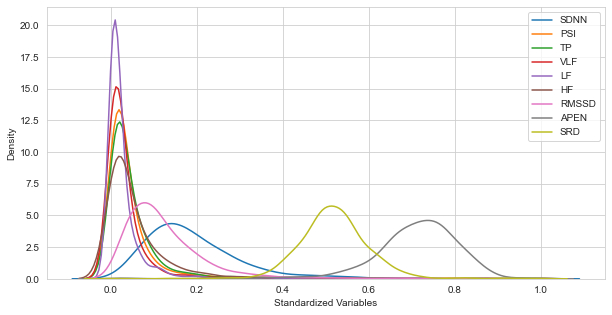

In [42]:
plt.figure(figsize = (10, 5))
sns.set_style("whitegrid")
plt.grid(True)
plt.xlabel('Standardized Variables',fontsize=10)
plt.ylabel('Density',fontsize=10)

sns.kdeplot(SDNN)
sns.kdeplot(PSI)
sns.kdeplot(TP)
sns.kdeplot(VLF)
sns.kdeplot(LF)
sns.kdeplot(HF)
sns.kdeplot(RMSSD)
sns.kdeplot(APEN)
sns.kdeplot(SRD)


# plt.legend()
plt.legend(['SDNN', 'PSI', 'TP', 'VLF', 'LF', 'HF', 'RMSSD', 'APEN', 'SRD'], fontsize=10)

# plt.savefig('distribution.png')

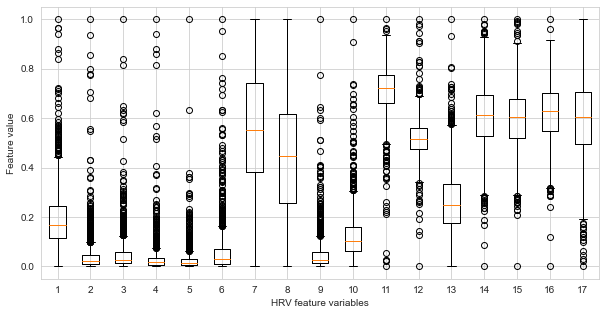

In [52]:
# fig, ax = plt.subplots()
plt.figure(figsize = (10, 5))
plt.xlabel('HRV feature variables',fontsize=10)
plt.ylabel('Feature value',fontsize=10)
plt.boxplot(mdd_hrv)
plt.show()

In [65]:
mdds_box = mdds.loc[:, ['sdnn','psi','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen',
                                  'srd','tsrd', 'tp_ln', 'vlf_ln','lf_ln','hf_ln']]

In [66]:
## Normalize between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mdds_box[:] = scaler.fit_transform(mdds_box[:])

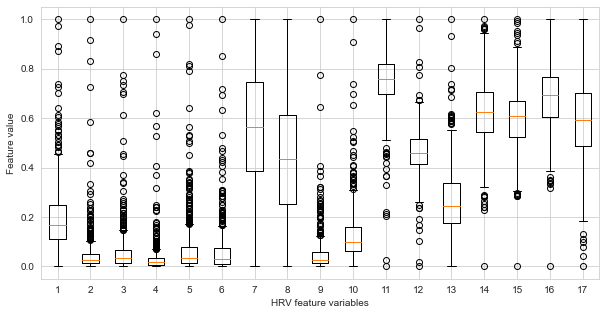

In [67]:
# fig, ax = plt.subplots()
plt.figure(figsize = (10, 5))
plt.xlabel('HRV feature variables',fontsize=10)
plt.ylabel('Feature value',fontsize=10)
plt.boxplot(mdds_box)
plt.show()

In [68]:
## Normalize between 0 and 1
# from sklearn.preprocessing import MinMaxScaler
mddr_box = mddr.loc[:, ['sdnn','psi','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen',
                                  'srd','tsrd', 'tp_ln', 'vlf_ln','lf_ln','hf_ln']]
scaler = MinMaxScaler()
mddr_box[:] = scaler.fit_transform(mddr_box[:])

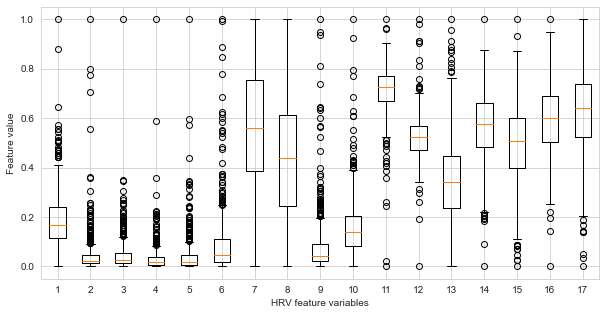

In [69]:
# fig, ax = plt.subplots()
plt.figure(figsize = (10, 5))
plt.xlabel('HRV feature variables',fontsize=10)
plt.ylabel('Feature value',fontsize=10)
plt.boxplot(mddr_box)
plt.show()

In [70]:
## Normalize between 0 and 1
# from sklearn.preprocessing import MinMaxScaler
pdd_box = pdd.loc[:, ['sdnn','psi','tp','vlf','lf','hf','lfnorm','hfnorm','lf_hf','rmssd','apen',
                                  'srd','tsrd', 'tp_ln', 'vlf_ln','lf_ln','hf_ln']]
scaler = MinMaxScaler()
pdd_box[:] = scaler.fit_transform(pdd_box[:])

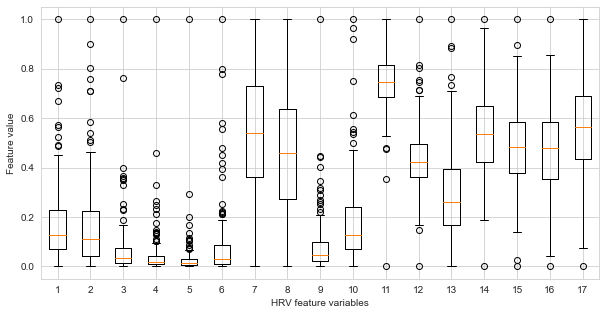

In [71]:
# fig, ax = plt.subplots()
plt.figure(figsize = (10, 5))
plt.xlabel('HRV feature variables',fontsize=10)
plt.ylabel('Feature value',fontsize=10)
plt.boxplot(pdd_box)
plt.show()

## Check data variables correlation coefficient

In [72]:
mdd_hrv_core_variables = hrv_mdd.loc[:, ['sdnn', 'psi', 'tp', 'vlf', 'lf', 'hf', 'rmssd', 'apen', 'srd']]
mdd_hrv_core_variables_with_label = hrv_mdd.loc[:, ['main_dx', 'sdnn', 'psi', 'tp', 'vlf', 'lf', 'hf', 'rmssd', 'apen', 'srd']]

In [73]:
corr = mdd_hrv_core_variables.corr()
corr

,sdnn,tp,vlf,lf,hf,rmssd,apen,srd
sdnn,1.000000,0.849377,0.691468,0.673411,0.692228,0.797041,-0.357656,-0.127717
tp,0.849377,1.000000,0.887056,0.803915,0.603380,0.648672,-0.287216,-0.104364
vlf,0.691468,0.887056,1.000000,0.504455,0.302863,0.407754,-0.299764,-0.136480
lf,0.673411,0.803915,0.504455,1.000000,0.473458,0.526272,-0.150904,-0.061027
hf,0.692228,0.603380,0.302863,0.473458,1.000000,0.829150,-0.181777,0.017071
rmssd,0.797041,0.648672,0.407754,0.526272,0.829150,1.000000,-0.231734,0.031015
apen,-0.357656,-0.287216,-0.299764,-0.150904,-0.181777,-0.231734,1.000000,0.090104
srd,-0.127717,-0.104364,-0.136480,-0.061027,0.017071,0.031015,0.090104,1.000000


In [74]:
correlation = pd.DataFrame(corr)

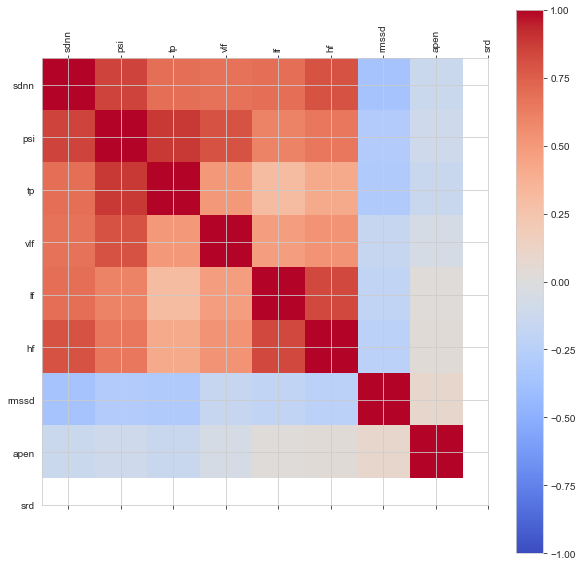

In [75]:
corr = mdd_hrv_core_variables.corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(mdd_hrv_core_variables.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(mdd_hrv_core_variables.columns)
ax.set_yticklabels(mdd_hrv_core_variables.columns)
plt.show()

## Multiple regression

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
x = mdd_hrv_core_variables_with_label[['sdnn', 'tp', 'vlf', 'lf', 'hf', 'rmssd', 'apen', 'srd']]
y = mdd_hrv_core_variables_with_label['main_dx']

In [ ]:
y = y.replace({'MDDs': 0})
y = y.replace({'MDDr': 1})
y = y.replace({'PDD': 2})

In [ ]:
x.dtypes

In [ ]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)